# Model Building

We are going to use ensemble learning algorithms to build the model. Before building and training the model, we need to separate the dependent variable and split the dataset into training and testing set.

In [ ]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

In [ ]:
## For ignoring warnings to view clean output
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
## Importing the dataset
df = pd.read_csv('cleaned.csv',header=0)

In [ ]:
df.sample(10)

,Year,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
6703,2014,Chefe Donsa,Black Soil,27.0,12.5,559.8,53.0,1060.0
2037,2018,Minjar,Light Soil,30.0,15.0,543.8,57.0,2206.0
6848,2014,Chefe Donsa,Black Soil,27.0,14.0,559.8,50.0,420.0
4642,2019,DZ-BS,Black Soil,30.5,11.0,811.2,44.0,1120.0
4361,2019,DZ-BS,Black Soil,28.5,11.5,811.2,40.0,2200.0
3044,2018,Denkaka,Black Soil,28.0,12.5,543.8,18.0,2423.0
3184,2018,Chefe Donsa,Black Soil,24.0,10.0,543.8,63.0,1176.0
3358,2018,Chefe Donsa,Black Soil,23.0,12.5,543.8,56.0,1240.0
5645,2019,Chefe Donsa,Black Soil,21.5,14.0,811.2,80.0,330.0
3961,2015,DZ-BS,Black Soil,26.0,12.0,510.9,68.0,2075.0


In [ ]:
df.drop(['Year'],axis=1, inplace=True)

In [ ]:
df.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
0,Chefe Donsa,Black Soil,31.0,13.0,811.2,68.0,980.0
1,Chefe Donsa,Black Soil,30.5,16.0,811.2,72.0,670.0
2,Chefe Donsa,Black Soil,29.5,14.0,811.2,68.0,730.0
3,Chefe Donsa,Black Soil,30.0,13.0,811.2,54.0,710.0
4,Chefe Donsa,Black Soil,31.0,12.0,811.2,70.0,780.0


In [ ]:
df.shape

(8077, 7)

In [ ]:
### Separating Independent and Dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:, 6]

In [ ]:
X.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity
0,Chefe Donsa,Black Soil,31.0,13.0,811.2,68.0
1,Chefe Donsa,Black Soil,30.5,16.0,811.2,72.0
2,Chefe Donsa,Black Soil,29.5,14.0,811.2,68.0
3,Chefe Donsa,Black Soil,30.0,13.0,811.2,54.0
4,Chefe Donsa,Black Soil,31.0,12.0,811.2,70.0


In [ ]:
X.shape

(8077, 6)

In [ ]:
y.head()

0    980.0
1    670.0
2    730.0
3    710.0
4    780.0
Name: Yield Kg/ha, dtype: float64

### Data Transformation
#### Handling Categorical Variables - Creating Dummy Variables( Changing the categorical value to numeric(0,1))

In [ ]:
# Shows the number of columns after creating dummy variables
pd.get_dummies(df,drop_first=True).shape

(8077, 12)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.sample(4)

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Location_Alemtena,Location_Chefe Donsa,Location_DZ-BS,Location_DZ-LS,Location_Denkaka,Location_Minjar,Soil Type_Light Soil
2773,22.0,13.0,543.8,18.0,0,0,1,0,0,0,0
785,23.5,13.5,811.2,40.0,0,1,0,0,0,0,0
6813,29.0,13.0,559.8,44.0,0,1,0,0,0,0,0
1779,26.0,11.0,543.8,59.0,0,0,0,0,0,1,1


In [ ]:
X.shape

(8077, 11)

### Standardization 
Before building the model we need to standardize the features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
## shows the wheather the features are in standardized format or not
print("Mean of the dataset:", np.mean(X).round(8))
print("Standard deviation of the dataset: ", np.std(X).round(8))

Mean of the dataset: -0.0
Standard deviation of the dataset:  1.0


### Splitting the dataset into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# print the shapes of our training and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6461, 11)
(1616, 11)
(6461,)
(1616,)


### Model Building with Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
RF=RandomForestRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 3.312156915664673 sec


In [ ]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 466.5371306920871
MSE: 455493.48875731847
RMSE: 674.9025772341653


In [ ]:
RF.score(X_test,y_test)

0.6279135370403165

In [ ]:
RF.score(X_train,y_train)

0.9442951107965777

In [ ]:
y_pred=RF.predict(X_test)

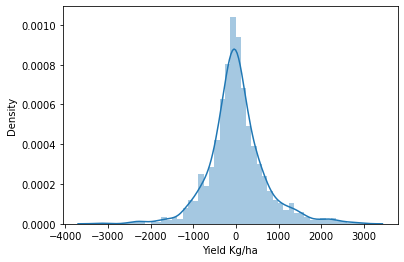

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

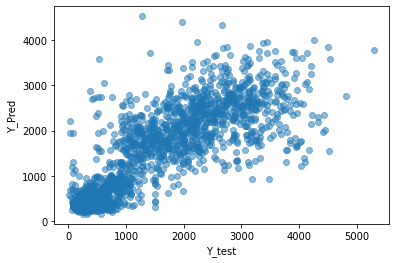

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [ ]:
metrics.r2_score(y_test,y_pred)

0.6279135370403165

### Model Building with AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
import time
start_time = time.time()
RF=AdaBoostRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.5595874786376953 sec


In [ ]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 555.3894916301043
MSE: 508569.70362560474
RMSE: 713.1407319916628


In [ ]:
RF.score(X_test,y_test)

0.5845562958391128

In [ ]:
RF.score(X_train,y_train)

0.5914320446918009

In [ ]:
y_pred=RF.predict(X_test)

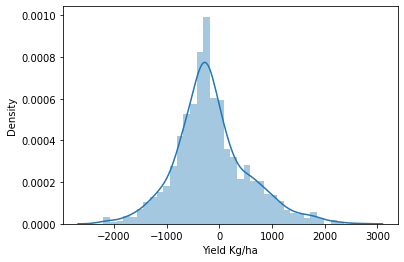

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

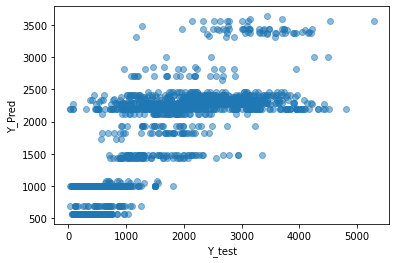

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
import time
start_time = time.time()
RF=AdaBoostRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.3058593273162842 sec


In [ ]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 557.020136262922
MSE: 510258.137394668
RMSE: 714.3235523169232


In [ ]:
RF.score(X_test,y_test)

0.5831770371568725

In [ ]:
RF.score(X_train,y_train)

0.5955391583718879

### Model Building with GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
RF = GradientBoostingRegressor() 
RF.fit(X_train, y_train) 
   
# Predicting the Test set results 
y_pred = RF.predict(X_test)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 1.1983962059020996 sec


In [ ]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 459.3045647074843
MSE: 410922.0981562455
RMSE: 641.0320570425831


In [ ]:
RF.score(X_test,y_test)

0.6643233024646116

In [ ]:
RF.score(X_train,y_train)

0.6886377932066305

In [ ]:
y_pred=RF.predict(X_test)

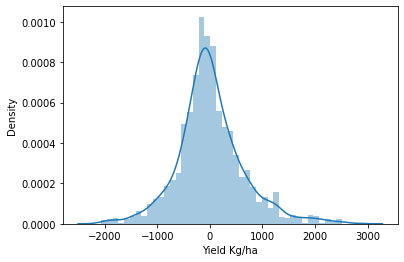

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

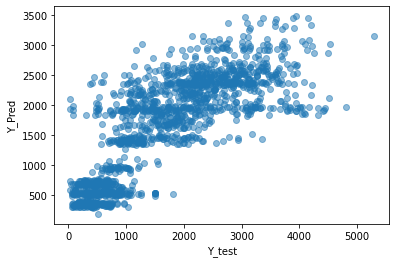

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [ ]:
!pip install xgboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
start_time = time.time()
model = xgb.XGBRegressor()
# feeding the training data into the model
model.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

[03:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Execution time: 0.40363073348999023 sec


In [ ]:
# predicting the values for x-test
pred=model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 461.2151031588564
MSE: 411871.6275139708
RMSE: 641.7722551762197


In [ ]:
model.score(X_test,y_test)

0.6635476447902147

In [ ]:
model.score(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

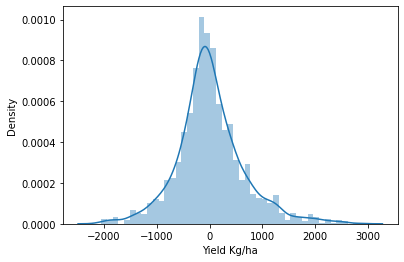

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

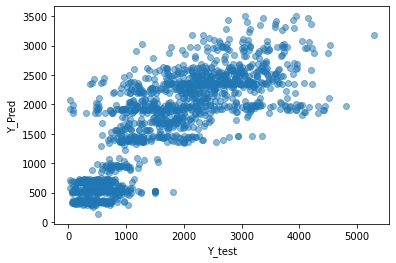

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()